In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.columns = df.columns.str.strip()


In [6]:
if "loan_id" in df.columns:
    df.drop("loan_id", axis=1, inplace=True)


In [7]:
df["loan_status"] = df["loan_status"].astype(str).str.strip()

df["loan_status"] = df["loan_status"].map({
    "Approved": 1,
    "Rejected": 0
})


In [8]:
df["loan_status"].value_counts()


loan_status
1    2656
0    1613
Name: count, dtype: int64

In [9]:
df["education"] = df["education"].astype(str).str.strip().map({
    "Graduate": 1,
    "Not Graduate": 0
})

df["self_employed"] = df["self_employed"].astype(str).str.strip().map({
    "Yes": 1,
    "No": 0
})


In [10]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [11]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7985948477751756


In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=10,
    random_state=42
)

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9672131147540983


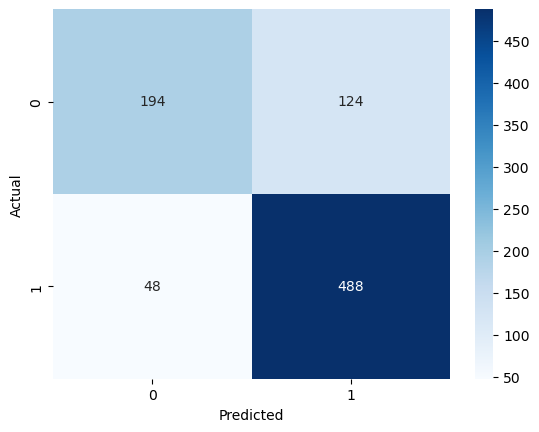

              precision    recall  f1-score   support

           0       0.80      0.61      0.69       318
           1       0.80      0.91      0.85       536

    accuracy                           0.80       854
   macro avg       0.80      0.76      0.77       854
weighted avg       0.80      0.80      0.79       854



In [15]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred_log))


In [18]:
new_applicant = pd.DataFrame({
    "no_of_dependents": [2],
    "education": [1],              # Graduate
    "self_employed": [0],          # No
    "income_annum": [600000],
    "loan_amount": [200000],
    "loan_term": [360],
    "cibil_score": [750],
    "residential_assets_value": [500000],
    "commercial_assets_value": [0],
    "luxury_assets_value": [0],
    "bank_asset_value": [200000]
})

prediction = log_model.predict(new_applicant)

result = "Approved" if prediction[0] == 1 else "Rejected"
result


'Rejected'

In [19]:
import pandas as pd
from sklearn.metrics import accuracy_score

comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt)
    ]
})

comparison


,Model,Accuracy
0,Logistic Regression,0.798595
1,Decision Tree,0.967213


In [20]:
print("Decision Tree Train Accuracy:", dt_model.score(X_train, y_train))
print("Decision Tree Test Accuracy:", dt_model.score(X_test, y_test))


Decision Tree Train Accuracy: 0.9692532942898975
Decision Tree Test Accuracy: 0.9672131147540983


In [21]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance


,Feature,Importance
6,cibil_score,0.888835
5,loan_term,0.084878
4,loan_amount,0.013015
3,income_annum,0.011003
9,luxury_assets_value,0.001059
7,residential_assets_value,0.001019
0,no_of_dependents,0.000191
2,self_employed,0.000000
1,education,0.000000
8,commercial_assets_value,0.000000


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [23]:
rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=6,           # controls overfitting
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

In [24]:
y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_accuracy


0.9730679156908665

In [25]:
comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ]
})

comparison


,Model,Accuracy
0,Logistic Regression,0.798595
1,Decision Tree,0.967213
2,Random Forest,0.973068


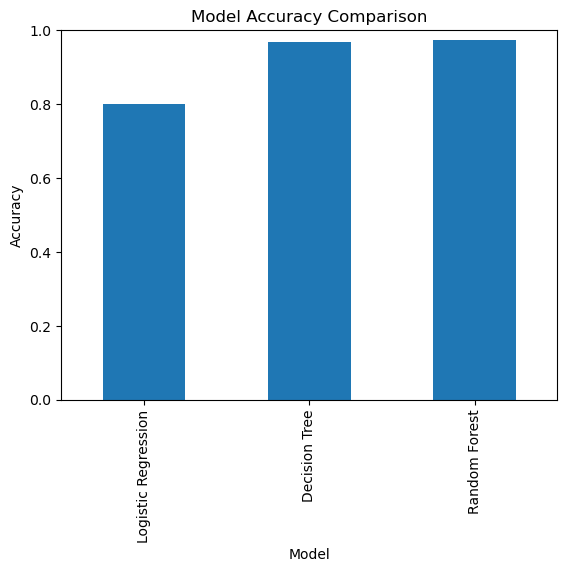

In [26]:
comparison.plot(
    x="Model",
    y="Accuracy",
    kind="bar",
    legend=False
)

plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [27]:
rf_prediction = rf_model.predict(new_applicant)

rf_result = "Approved" if rf_prediction[0] == 1 else "Rejected"
rf_result


'Approved'

In [28]:
import joblib

joblib.dump(rf_model, "loan_approval_model.pkl")


['loan_approval_model.pkl']